# Carbon Emissions
This case study leverages two comprehensive datasets to explore the global impact of carbon emissions. The first dataset, Annual Surface Temperature Change, provides temperature anomalies across various countries relative to a baseline, measured in degrees Celsius. The dataset spans from 1960 to 2022 and includes annual observations, offering a temporal perspective on how global temperatures have shifted over decades. Key features include country names and temperature change values for each year.

The second dataset, Monthly Atmospheric CO₂ Concentrations, includes global CO₂ measurements from 1958 to 2024. The data is represented in parts per million (ppm), with monthly observations that allow for detailed temporal analysis. The primary features include the date of measurement and CO₂ concentration values. Together, these datasets provide a robust foundation for analyzing climate trends and understanding the link between carbon emissions and global warming.

**Source:** https://statso.io/carbon-emissions-worldwide-case-study/

**Cleaning techniques:** https://www.kdnuggets.com/10-essential-data-cleaning-techniques-explained-in-12-minutes

## Problem

The central challenge of this case study is to understand and address the impacts of carbon emissions on global temperatures. Climate change, driven by rising CO₂ levels, has emerged as a critical issue, prompting the need for actionable insights that can guide policy decisions. The key objectives are to identify historical trends, detect anomalies, and simulate future scenarios to evaluate potential policy outcomes.

First, it is crucial to examine historical data to understand how CO₂ concentrations and temperature anomalies have evolved over time. By identifying long-term trends and correlations, the analysis can uncover the direct relationship between these variables. This includes understanding how industrialization and other anthropogenic factors have influenced climate patterns.

Second, detecting anomalies in temperature and CO₂ levels can reveal significant events that deviate from expected patterns. Such anomalies might point to natural phenomena, such as volcanic eruptions, or anthropogenic events, like spikes in industrial emissions. Understanding the causes of these outliers can provide insights into the drivers of climate variability.

Finally, the study aims to simulate “what-if” scenarios to predict the impact of changes in CO₂ concentrations on global temperatures. For instance, what happens if CO₂ levels increase or decrease by a specific percentage? These simulations can offer a quantitative basis for climate policies, emphasizing the importance of reducing emissions to mitigate global warming. By understanding these patterns, governments and organizations can make data-driven decisions to address climate change effectively.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_carb = 'data/carbon_emmission.csv'

carbon = pd.read_csv(file_carb)

## Data Cleaning

Some dates seem to be repeated, appearing below the ones that store the measure of interest (Monthly Atmospheric CO₂ Concentrations). The values stored in the repeated rows are less than 1, which is unexpected and unrealistic for an atmospheric CO₂ concentration measure based on parts per million (ppm). "Parts per million" by definition refers to a proportion of molecules in a mixture and it's not reasonable to have a negative number of molecules. A pervasive gas like CO₂ in the atmosphere can't realistically drop near to zero quite dramatically across the entire globe.

In [2]:
# One observation per month is expected
print('Number of observations expected to be unique:',carbon.shape[0])
print('Number of unique dates (before processing):', carbon.Date.nunique())

Number of observations expected to be unique: 1570
Number of unique dates (before processing): 791


The pattern of invalid data appearing after the valid is present in the whole dataset. Identifying them with the duplicated method and then making a subset to keep only the valid observations was the approach taken.

In [3]:
# Identify and remove repeated dates

# Booleans, where duplicates are labeled as True except for the first ocurrence
duplicates = carbon['Date'].duplicated()
carbon = carbon[duplicates == False]

print('Number of observations after removing duplicated dates:',carbon.shape[0])
print('Number of unique dates (after processing):', carbon.Date.nunique())

Number of observations after removing duplicated dates: 791
Number of unique dates (after processing): 791


The dates were originally stored as strings, with the format `'YYYYMDD'` (for example `1958M01`). The changes consisted in removing that `'M'` and adding a `'-01'` string to stand for the first day of the month.

In [4]:
# Fix the date format and set as datetime index
carbon['Date'] = carbon['Date'].str.replace('M', '-')
carbon['Date'] = carbon['Date'].apply(lambda x: x + '-01')
carbon['Date'] = pd.to_datetime(carbon['Date'])
carbon.set_index('Date', inplace=True)

print(carbon.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 791 entries, 1958-03-01 to 2024-01-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ObjectId  791 non-null    int64  
 1   Country   791 non-null    object 
 2   Value     791 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.7+ KB
None


After looking at the distribution plots, one outlier is identified lying below the lower whisker. It's near zero, and given the properties of the Monthly Atmospheric CO₂ Concentrations measure, values near zero are unrealistic. Removing that observation is the last cleaning step.

In [5]:
plt.style.use('default')

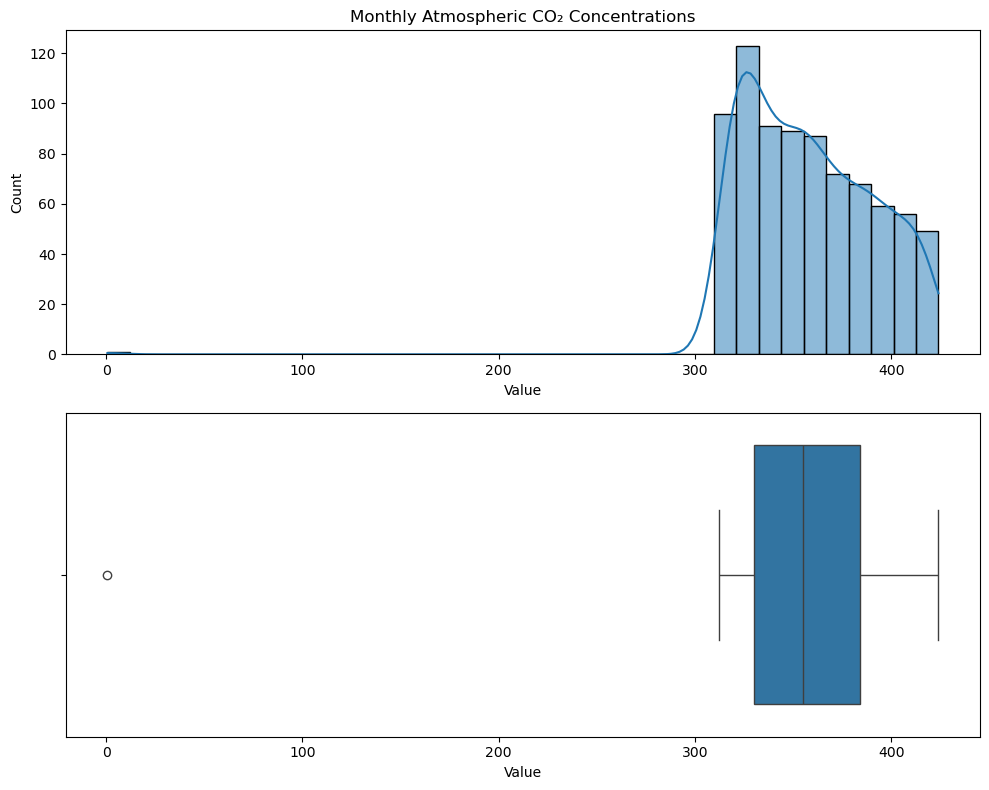

In [6]:
# Distribution of concentrations
fig, ax = plt.subplots(nrows=2, figsize=(10, 8))

ax[0].set_title('Monthly Atmospheric CO₂ Concentrations')
sns.histplot(carbon['Value'], kde=True, ax=ax[0])
sns.boxplot(carbon['Value'], orient='h', ax=ax[1])
plt.tight_layout()
plt.show()

In [7]:
# Identify and remove the outlier
iqr = np.quantile(carbon['Value'], 0.75) - np.quantile(carbon['Value'], 0.25)
lower_whisker = np.quantile(carbon['Value'], 0.25) - (1.5 * iqr)
out = carbon[carbon['Value'] < lower_whisker]

print('Lower whisker:', round(lower_whisker, 2))
print('Observation to remove:')
print(out)

carbon.drop(index='2024-01-01', inplace=True)

print('Updated shape:', carbon.shape)

Lower whisker: 248.96
Observation to remove:
            ObjectId Country  Value
Date                               
2024-01-01      1569   World   0.68
Updated shape: (790, 3)


# Descriptive analysis

## Monthly Atmospheric CO₂ Concentration
This analysis investigates monthly CO₂ levels from 1958 to 2024, measured in parts per million (ppm). The average concentration was 358.7 ppm, with a median of 354.91.The fact that the average is higher than the median is consistent with a right-skewed distribution. This aligns with the presence of higher CO₂ levels in more recent years, supporting the long-term upward trend observed in the time-series plot.

The distribution is right-skewed (skewness = 0.36), meaning the tail extends to the right, with most data concentrated on the lower concentration side. This is consistent with earlier decades having generally lower CO₂ levels than recent ones. The kurtosis is –1.05, indicating a platikurtic distribution—less prone to extreme values than a normal curve.

A normality test strongly rejects normality (p ≪ 0.05), confirming the distribution’s asymmetry. The standard deviation is 31.35 ppm, showing a steady but tight increase across decades.

In [8]:
from functions.my_functions import summarize

# Atmospheric concentration summarization
summarize(
    df=carbon,
    field='Value',
    title='Atmospheric CO₂ Concentration',
    description='monthly concentration based on parts of molecules per million.'
    )


  Atmospheric CO₂ Concentration
  - Measure description: monthly concentration based on parts of molecules per million.
  Central tendency
  - Mean: 358.7
  - Median: 354.91

  Spread
  - Standard deviation: 31.35

  Quantiles
  - Minimum value: 312.43
  - 25th quantile: 330.2
  - 50th quantile: 354.91
  - 75th quantile: 384.23
  - Maximum value: 424.0

  Skewness and kurtosis
  - Skewness: 0.36
    Right-skewed: data concentrated on the left side; tail extends to the right. Expect: mean higher than median.
  - Kurtosis: -1.05
    Platikurtic: thinner tails and flatter peak. Expect: fewer extreme values than the normal.

  Normality test
  Null hypothesis: the data comes from a normal distribution.
  - Statistic: 236.74
  - P-value: 3.915914139037395e-52
    The data is unlikely to come from a normal distribution.
  


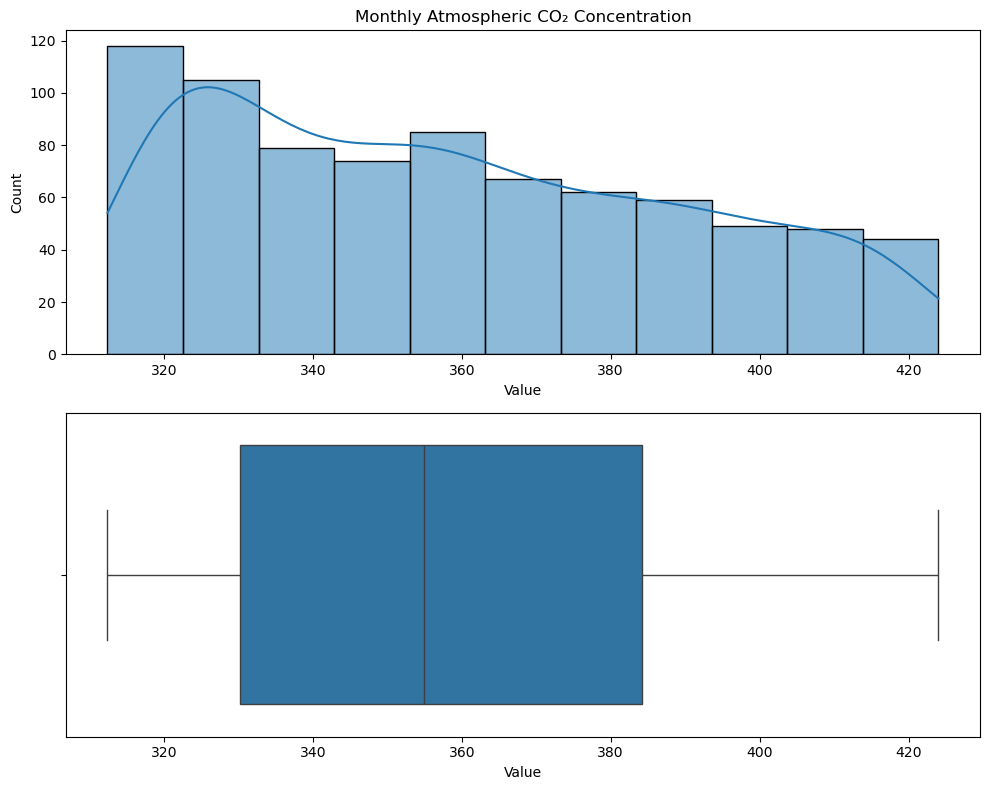

In [9]:
# Display the distribution of atmospheric concentration
fig, ax = plt.subplots(nrows=2, figsize=(10, 8))

ax[0].set_title('Monthly Atmospheric CO₂ Concentration')
sns.histplot(carbon['Value'], kde=True, ax=ax[0])
sns.boxplot(carbon['Value'], orient='h', ax=ax[1])
plt.tight_layout()
plt.show()

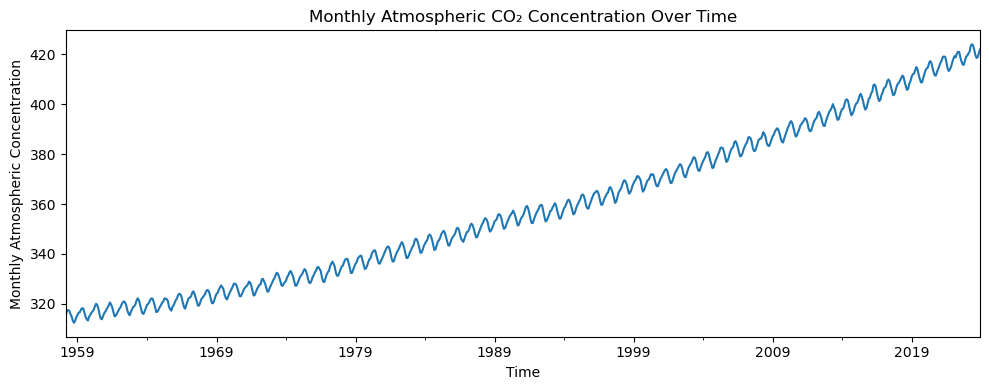

In [10]:
# Evolution of concentrations over time
carbon['Value'].plot(
    title='Monthly Atmospheric CO₂ Concentration Over Time',
    xlabel='Time',
    ylabel='Monthly Atmospheric Concentration',
    figsize=(10, 4)
)
plt.tight_layout()
plt.show()

## CO₂ Concentration (Monthly Percentual Variation)
This component evaluates the monthly percentage change in atmospheric CO₂ concentrations. The average monthly variation was 0.04%, while the median was 0.15%. This reflects a left-skewed distribution (skewness = –0.59), where most months experienced mild increases, but a small number of negative outliers pull the average downward. The distribution’s shape suggests that larger positive changes are becoming more frequent, with sporadic declines contributing to a secondary mode on the left.

With a kurtosis of –1.0, the curve is again platikurtic, lacking significant outliers.

The data clearly defies normality (p ≪ 0.05), confirming asymmetry and deviation from a bell-shaped curve. Combined with the evident seasonal cycles and upward trend in the time-series plot, this suggests that CO₂ variations follow non-random, structured patterns. Despite noise in month-to-month variation, the overall signal points to a quiet but relentless accumulation.

In [11]:
# Percentual change of the concentration over time
carbon['Monthly Variation'] = carbon['Value'].pct_change() * 100

# Atmospheric concentration (variation) summarization
summarize(
    df=carbon,
    field='Monthly Variation',
    description='percentage changes in the concentrations.'
)


  Monthly Variation
  - Measure description: percentage changes in the concentrations.
  Central tendency
  - Mean: 0.04
  - Median: 0.15

  Spread
  - Standard deviation: 0.35

  Quantiles
  - Minimum value: -0.73
  - 25th quantile: -0.28
  - 50th quantile: 0.15
  - 75th quantile: 0.33
  - Maximum value: 0.63

  Skewness and kurtosis
  - Skewness: -0.59
    Left-skewed: data concentrated on the right side; tail extends to the left. Expect: median higher than mean.
  - Kurtosis: -1.0
    Platikurtic: thinner tails and flatter peak. Expect: fewer extreme values than the normal.

  Normality test
  Null hypothesis: the data comes from a normal distribution.
  - Statistic: 206.18
  - P-value: 1.690856166082565e-45
    The data is unlikely to come from a normal distribution.
  


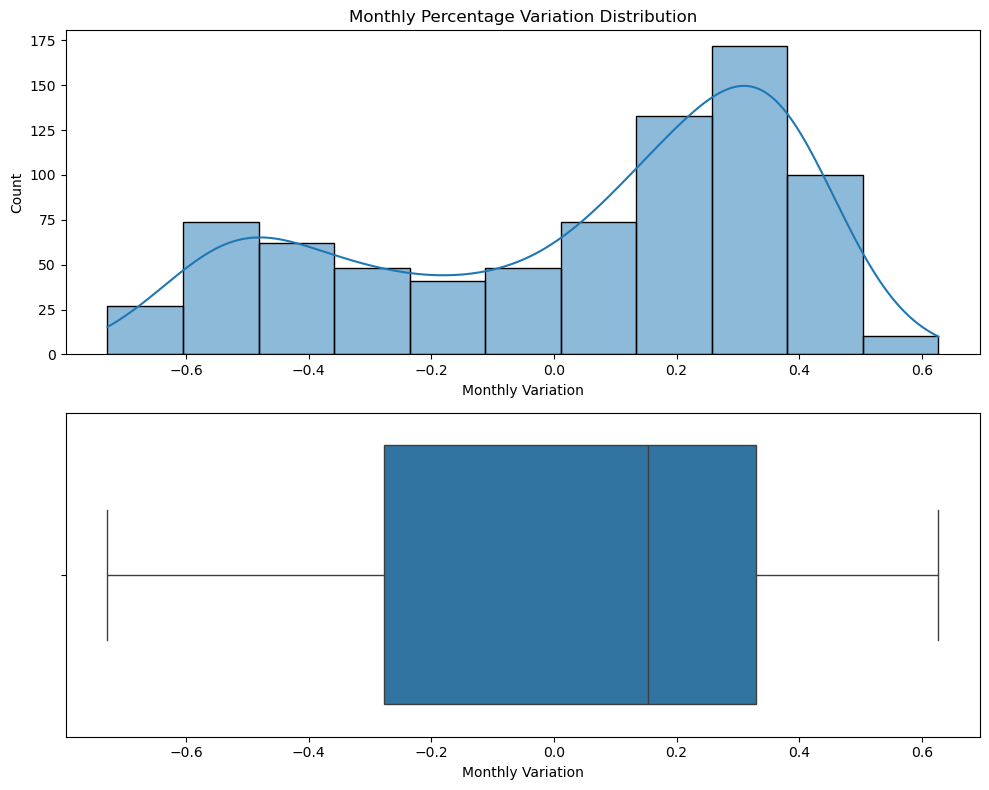

In [12]:
# Monthly variations distribution
fig, ax = plt.subplots(nrows=2, figsize=(10, 8))

ax[0].set_title('Monthly Percentage Variation Distribution')
sns.histplot(carbon['Monthly Variation'], kde=True, ax=ax[0])
sns.boxplot(carbon['Monthly Variation'], orient='h', ax=ax[1])
plt.tight_layout()
plt.show()

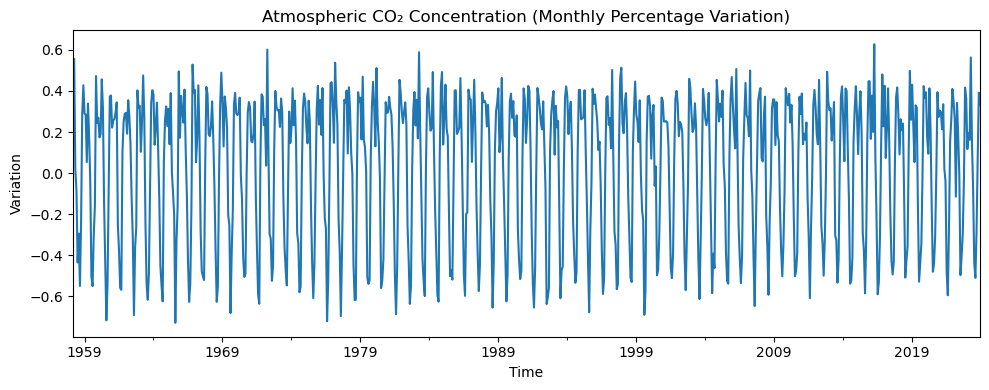

In [13]:
# Time-series plot
carbon['Monthly Variation'].plot(
    title='Atmospheric CO₂ Concentration (Monthly Percentage Variation)',
    xlabel='Time',
    ylabel='Variation',
    figsize=(10, 4)
)
plt.tight_layout()
plt.show()

## STL (Seasonal-Trend Decomposition)

### Montly concentration
The seasonal-trend decomposition reveals a strong and consistent seasonal cycle in atmospheric CO₂ levels. Each year follows a predictable pattern: CO₂ concentrations peak mid-year (typically around May or June) and dip toward the end of the year, reflecting natural carbon uptake by vegetation during growing seasons.

The trend component illustrates a clear long-term increase in global CO₂ levels from 1958 to 2024. This confirms the upward trajectory identified in the time-series plot, supporting the notion of accumulation over decades.

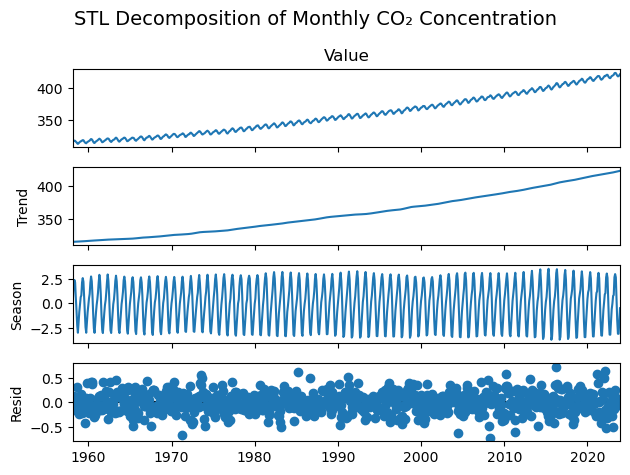

In [18]:
from statsmodels.tsa.seasonal import STL

# Apply STL decomposition to monthly concentration

# The datetime index is needed in advance in the dataframe
stl = STL(carbon['Value'], period=12)  # Monthly data = 12 periods per year
result = stl.fit()

result.plot()
plt.suptitle('STL Decomposition of Monthly CO₂ Concentration', fontsize=14)
plt.tight_layout()
plt.show()

### Percentage variation
The decomposition of the percentage changes uncovers a repeating seasonal rhythm, albeit subtler than that of the raw concentrations. These cycles suggest that month-to-month variation also exhibits a degree of predictability: periods of sharper growth follow periods of smaller shifts, often aligning with seasonal biological and atmospheric processes.

The trend component is relatively flat, meaning that the overall magnitude of monthly changes has remained stable over time. However, the presence of left-skewed distribution and minor noise in the residuals points to occasional negative deviations, likely linked to brief carbon drawdowns or anomalies.

Together, these patterns reinforce that CO₂ changes are not random but part of a structured, seasonal climate signal superimposed on a slow-building global trend.

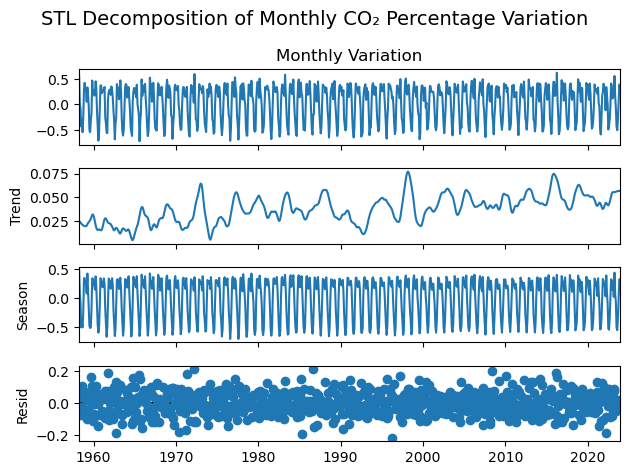

In [15]:
# Apply STL decomposition to monthly percentage variation
stl_var = STL(carbon['Monthly Variation'].dropna(), period=12)  # dropna for clean input
result_var = stl_var.fit()

result_var.plot()
plt.suptitle('STL Decomposition of Monthly CO₂ Percentage Variation', fontsize=14)
plt.tight_layout()
plt.show()

## Decades analysis

In [22]:
from functions.my_functions import create_decades

# Create labels for each decade
carbon['Decades'] = create_decades(carbon.index)
print('Decades created:', carbon['Decades'].unique())

Decades created: [1950 1960 1970 1980 1990 2000 2010 2020]


### Median Atmospheric CO₂ Concentration per Decade
The barplot shows a steady and uninterrupted rise in median CO₂ concentrations across each decade from the 1950s to the 2010s. The lowest median appears in the 1950s, and each successive decade registers a higher central value, highlighting the persistent accumulation of CO₂ in the atmosphere. This pattern reflects the long-term consequences of industrial activity, fossil fuel combustion, and land use change.

Decades    1960     1970    1980     1990     2000   2010
Value    320.29  330.755  345.58  359.715  378.855  400.1


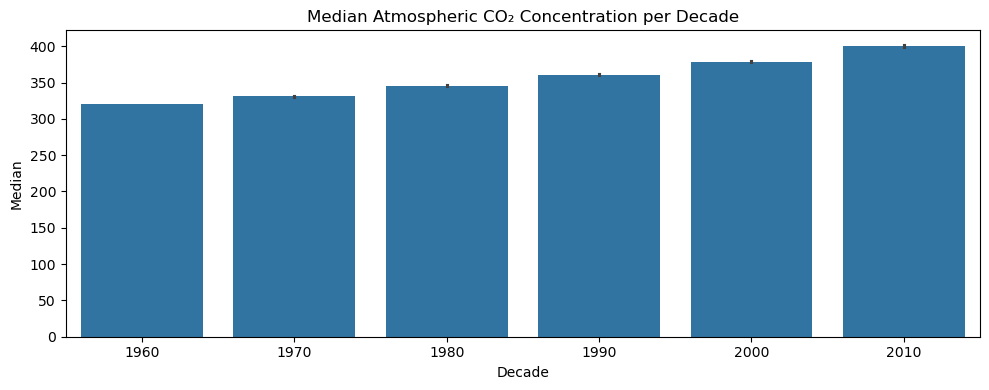

In [24]:
# Variations through decades (1950 and 2020 excluded)
data = carbon[~carbon['Decades'].isin([1950, 2020])]
decade_changes = pd.pivot_table(data=data, columns='Decades', values='Value', aggfunc='median')
print(decade_changes)

# Plot
plt.figure(figsize=(10, 4))
plt.title('Median Atmospheric CO₂ Concentration per Decade')
sns.barplot(data=data, x='Decades', y='Value')
plt.xlabel('Decade')
plt.ylabel('Median')
plt.tight_layout()
plt.show()

### Median Monthly CO₂ Variation per Decade
This second barplot explores how the typical month-to-month change in atmospheric CO₂ evolved over time. While the median monthly variation fluctuates slightly across decades, the values remain consistently positive, supporting the notion of a slow but continual rise. Subtle increases in recent decades may point toward strengthening seasonal dynamics or amplifying emission cycles.

Decades                1960      1970      1980      1990      2000      2010
Monthly Variation  0.168331  0.148641  0.180868  0.152601  0.132694  0.157713


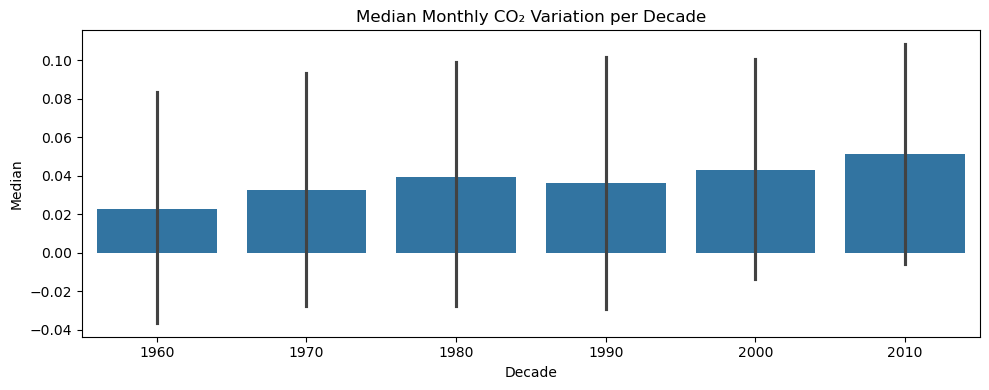

In [25]:
# Variations through decades (1950 and 2020 excluded)
data = carbon[~carbon['Decades'].isin([1950, 2020])]
decade_changes = pd.pivot_table(data=data, columns='Decades', values='Monthly Variation', aggfunc='median')
print(decade_changes)

# Plot
plt.figure(figsize=(10, 4))
plt.title('Median Monthly CO₂ Variation per Decade')
sns.barplot(data=data, x='Decades', y='Monthly Variation')
plt.xlabel('Decade')
plt.ylabel('Median')
plt.tight_layout()
plt.show()

### Distribution of Atmospheric CO₂ Concentrations by Decade
The decade-wise histograms provide a visual progression of CO₂ levels across time. The distribution curves shift clearly to the right with each successive decade, reflecting the steady accumulation of atmospheric CO₂.

In earlier decades (like the 1950s and 1960s), the distributions are narrower and centered at lower ppm values. As we move toward recent decades, not only do the peaks shift higher, but the spread (min–max range) also widens, suggesting increasing variability in monthly concentration levels.

The accompanying table reinforces this trend numerically:

- Minimum CO₂ levels rise steadily from 312 ppm in the 1950s to over 411 ppm in the 2020s.

- Median values march upward without exception, signaling consistent central growth.

- Maximum values climb in tandem, reaching 424 ppm by the 2020s.

Together, these visuals underscore the uninterrupted and accelerating build-up of atmospheric CO₂, not just in peak values but across the full distribution range.

In [26]:
# Maximum, minimum and averages per decade
decades_description = carbon.groupby('Decades').agg({'Value': ['min', 'median', 'max']})
print(decades_description)

          Value                 
            min   median     max
Decades                         
1950     312.43  315.640  318.29
1960     313.83  320.290  327.38
1970     323.06  330.755  339.26
1980     336.14  345.580  355.95
1990     351.38  359.715  371.15
2000     367.15  378.855  390.36
2010     387.03  400.100  414.86
2020     411.48  417.540  424.00


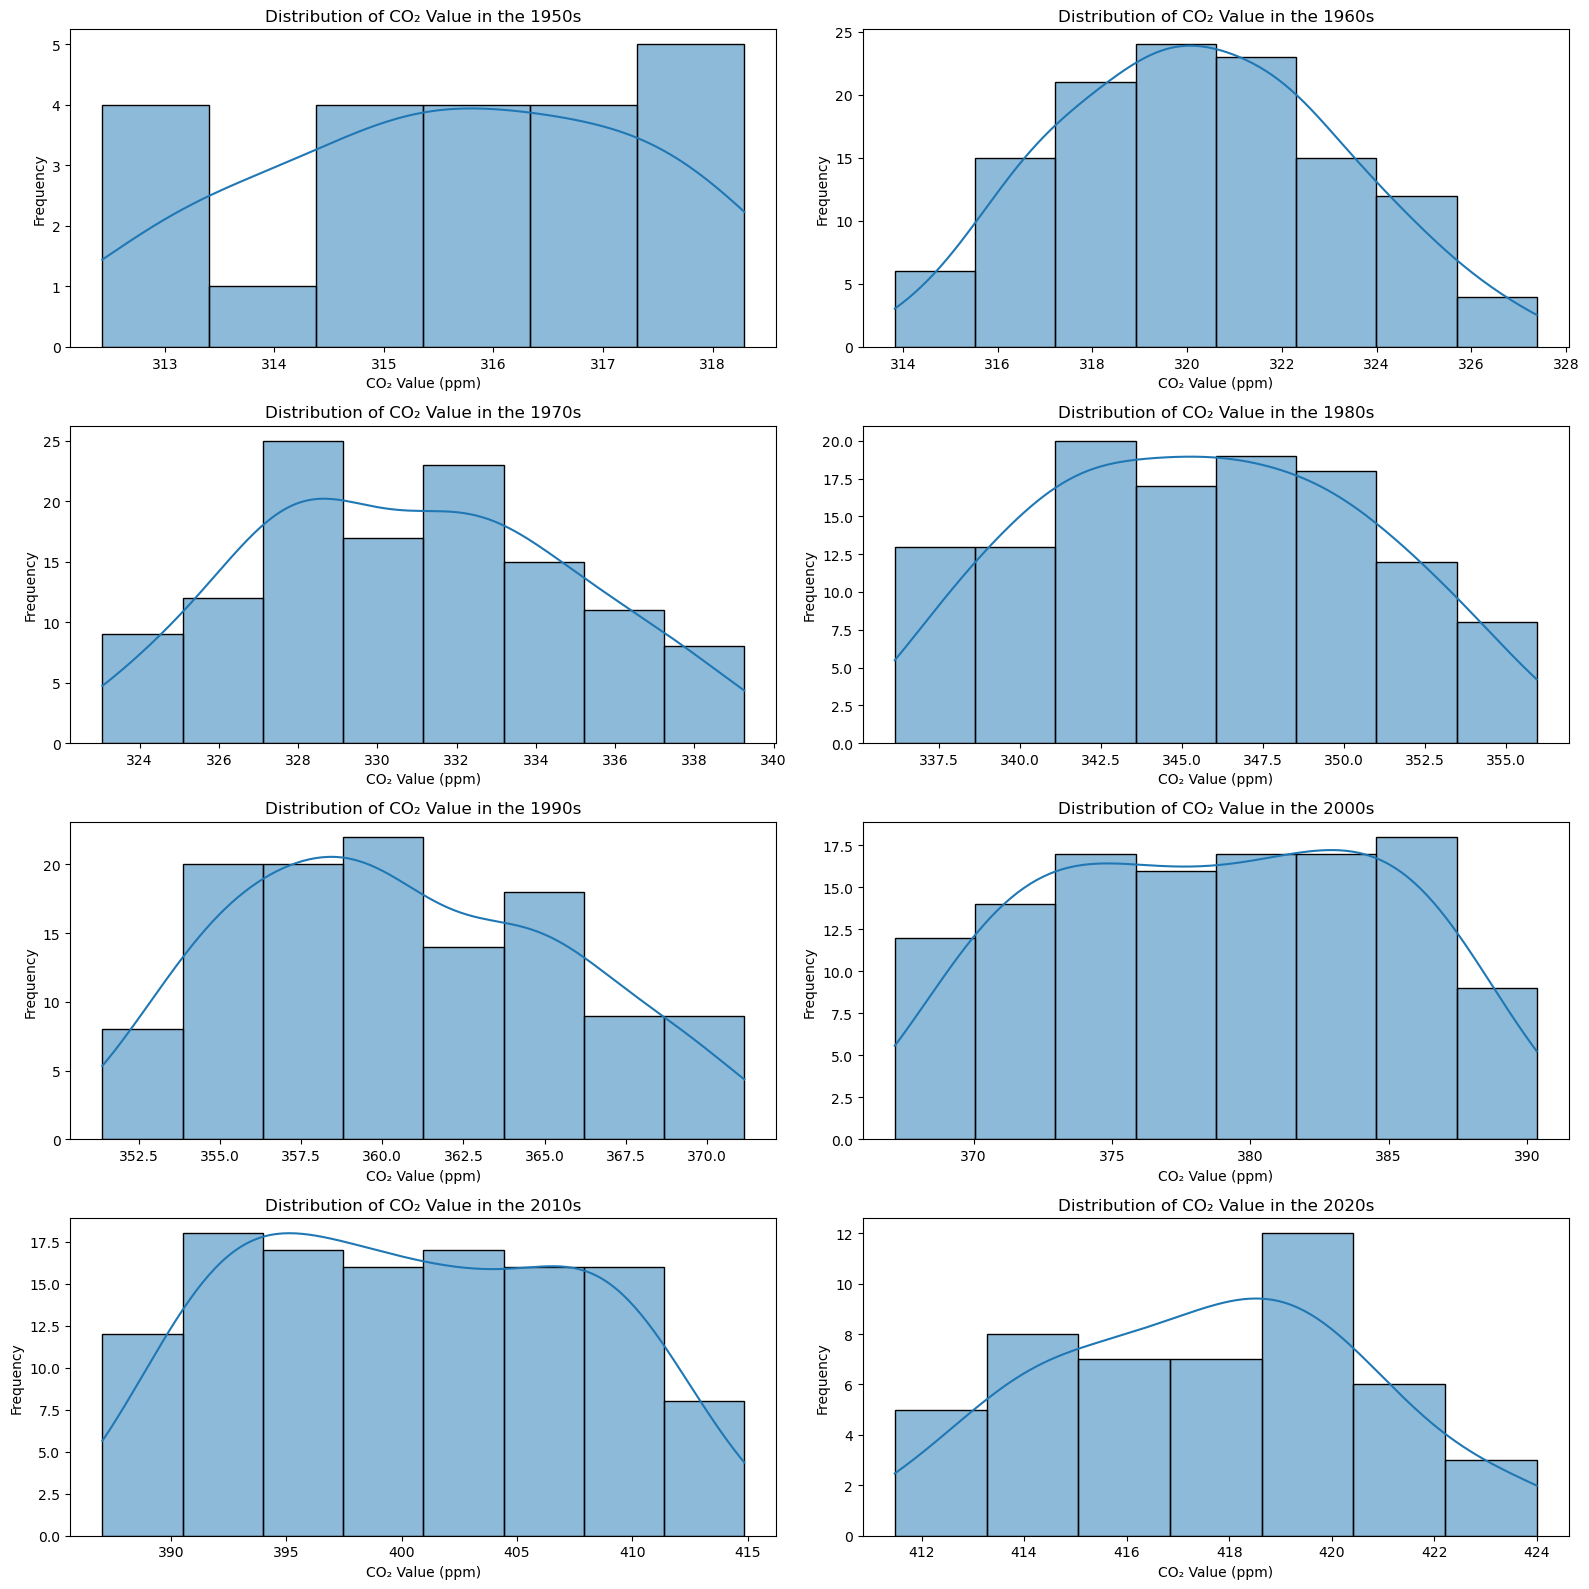

In [27]:
# Generate a plot of the distributions of value per each decade
decades_list = sorted(carbon['Decades'].unique())
num_decades = len(decades_list)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
# Easier iteration over the axes
axes = axes.flatten()

for i, decade in enumerate(decades_list):
    sns.histplot(data=carbon[carbon['Decades'] == decade], x='Value', ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of CO₂ Value in the {decade}s')
    axes[i].set_xlabel('CO₂ Value (ppm)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Seasons

### Seasonal CO₂ Concentration Trends
Seasonal breakdowns of atmospheric CO₂ levels reveal a clear, repeating structure shaped by terrestrial cycles. The median concentration reaches its highest point in Winter, reflecting minimal vegetation activity and reduced CO₂ uptake. Autumn, in contrast, registers the lowest median, likely capturing the tail end of seasonal drawdowns before accumulation begins anew.

Spring and Summer sit in between, showing transitional behavior where photosynthesis strengthens and begins removing CO₂ from the atmosphere, but not yet at its peak intensity. Winter’s distribution appears shifted furthest to the right, while Autumn’s is centered lowest, reinforcing the ecological dynamics driving this yearly pattern.

By supplementing these patterns with summary tables and individual seasonal plots, the data clearly illustrates the biological rhythm embedded in CO₂ concentrations, persistent over seasons and tightly woven into Earth’s climate engine.

In [28]:
# Create season labels
def get_season(x):
  if x in [3, 4, 5]:
    return 'Spring'
  elif x in [6, 7, 8]:
    return 'Summer'
  elif x in [9, 10, 11]:
    return 'Autumn'
  else:
    return 'Winter'

months = [date.month for date in carbon.index]
seasons = [*map(get_season, months)]

carbon['Season'] = seasons
print('Seasons added:', carbon.Season.unique())

Seasons added: ['Spring' 'Summer' 'Autumn' 'Winter']


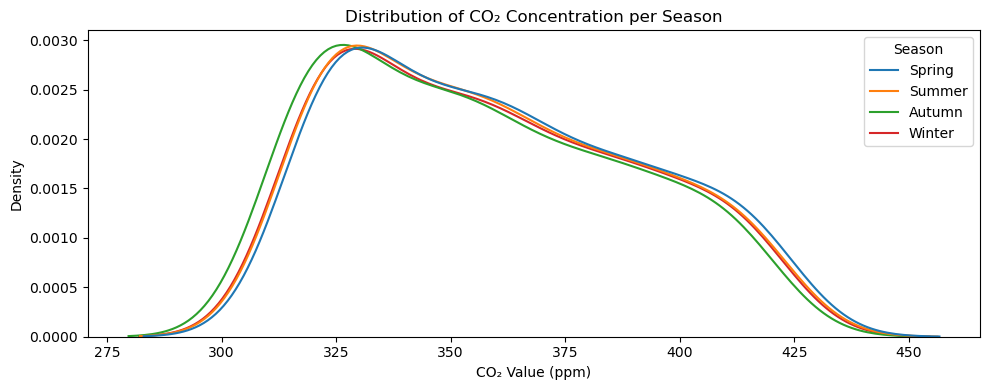

In [29]:
# Distribution of CO₂ Concentration per Season
plt.figure(figsize=(10, 4))

sns.kdeplot(data=carbon, x='Value', hue='Season')
plt.title('Distribution of CO₂ Concentration per Season')
plt.xlabel('CO₂ Value (ppm)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

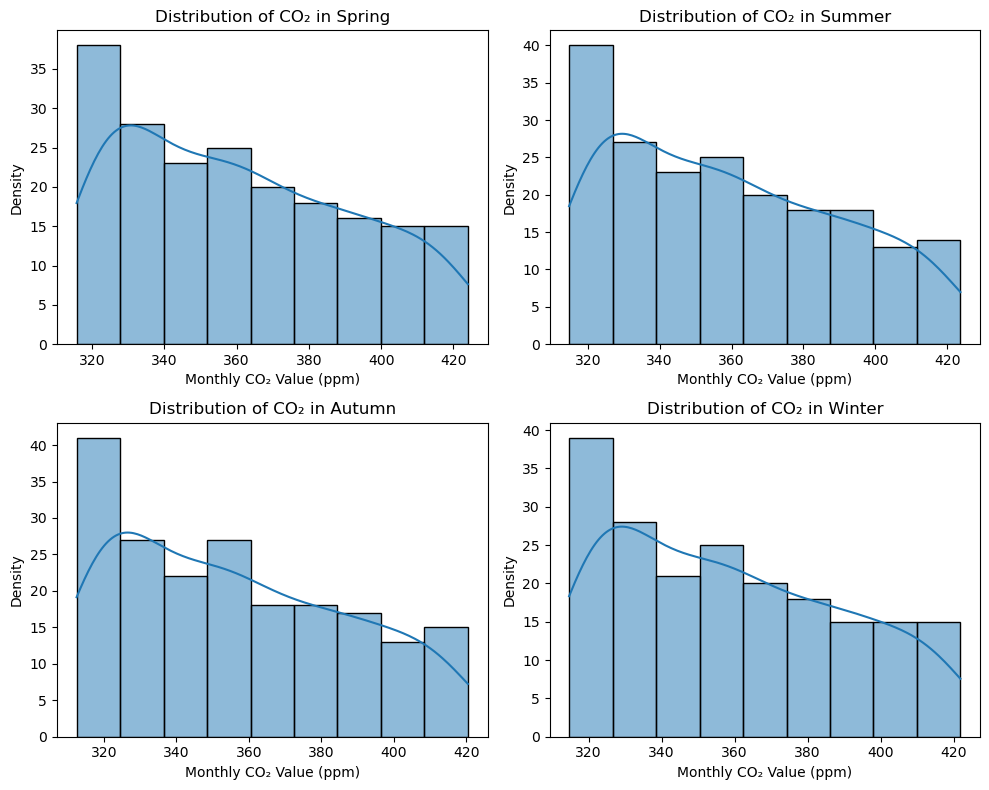

In [30]:
# Individual distribution per season
seasons = carbon['Season'].unique()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes = axes.flatten()

for index, season in enumerate(seasons):
  subset = carbon[carbon['Season'] == season]
  sns.histplot(data=subset, x='Value', ax=axes[index], kde=True)
  axes[index].set_title(f'Distribution of CO₂ in {season}')
  axes[index].set_xlabel('Monthly CO₂ Value (ppm)')
  axes[index].set_ylabel('Density')

plt.tight_layout()
plt.show()

         Value                        
           min  median    mean     max
Season                                
Autumn  312.43  352.38  356.25  420.46
Spring  315.70  357.36  360.59  424.00
Summer  314.80  355.22  359.16  423.68
Winter  314.67  355.16  358.81  421.86


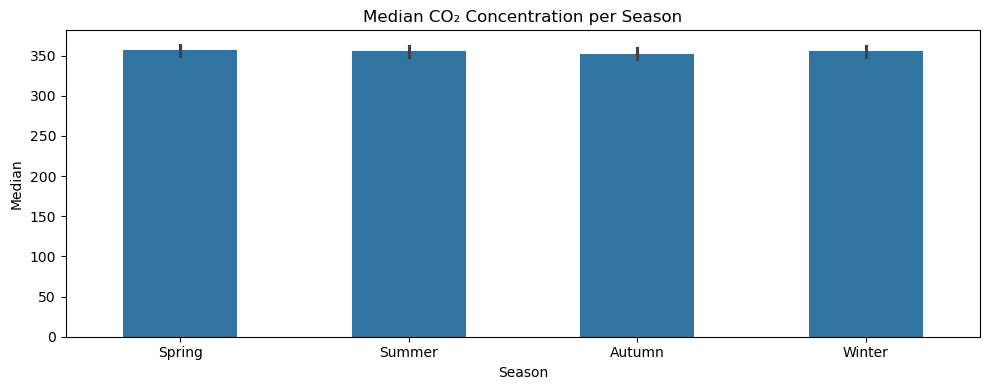

In [31]:
# Seasonal summary measures
season_summary = carbon.groupby('Season').agg({'Value': ['min', 'median', 'mean', 'max']})
print(season_summary.round(2))

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(data=carbon, x='Season', y='Value', width=0.5, estimator='median')
plt.title('Median CO₂ Concentration per Season')
plt.ylabel('Median')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

## Summary: Atmospheric CO₂ Concentration Insights
This section examined global CO₂ concentration data from multiple angles, like statistical distribution, temporal progression, and ecological seasonality, revealing a layered and persistent carbon signal.

- Overall Distribution: Monthly CO₂ levels averaged 358.7 ppm, with a right-skewed, platikurtic distribution. The mean exceeding the median reflects the gradual buildup of high-concentration values over time. A normality test confirmed the data's asymmetry and deviation from a bell-shaped curve.

- Variation Patterns: Monthly percentage changes had a left-skewed distribution (mean = 0.04%, median = 0.15%), with most values positive but a handful of negative outliers pulling the average downward. While small in magnitude, these changes compounded steadily across decades.

- STL Decomposition: The concentration time series displayed a strong seasonal cycle, with peaks in mid-year and troughs at the end. Trends showed sustained growth in both absolute levels and structured monthly changes, reinforcing the long-term impact of emissions layered with predictable natural rhythms.

- Decadal View: Median CO₂ levels increased in every decade without exception, from ~316 ppm in the 1950s to over 417 ppm in the 2020s. Distribution plots confirmed this shift, with widening ranges and higher peaks, underscoring the relentless climb.

- Seasonal Analysis: Concentration levels varied by season, with the highest medians occurring in Winter and the lowest in Autumn, reflecting the cycle of plant respiration and photosynthesis. Seasonal density curves and summary tables reinforced this ecological fingerprint.

Altogether, the evidence paints a clear picture: atmospheric CO₂ isn’t just increasing, it’s rising in a patterned, seasonal rhythm, with growing central values across time. These signals provide the foundation for investigating how temperature anomalies respond to long-term carbon accumulation.

In [32]:
filepath = 'data/carbon_last_modification.csv'
carbon.to_csv(filepath, index=True)